# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [32]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")
print(api_key)

None


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin",
                                            language="en")
bitcoin_articles['totalResults']

5134

In [5]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum",
                                            language="en")
ethereum_articles['totalResults']

1313

In [6]:
# Create df with all article data 
def articles_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:100]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

# Create a DataFrame with the news in English
bitcoin_articles_df = articles_df(bitcoin_articles['articles'])
ethereum_articles_df = articles_df(ethereum_articles['articles'])

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiment)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head(10)

,Compound,Negative,Neutral,Positive,Text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...
5,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."
6,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...
7,0.0258,0.073,0.850,0.076,image copyrightGetty Images\r\nBitcoin has hit...
8,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...
9,0.4019,0.000,0.883,0.117,Decentralized exchange protocols that allow cr...


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiment.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiment)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head(10)

,Compound,Negative,Neutral,Positive,Text
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...
1,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
3,0.4215,0.000,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
4,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...
5,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...
6,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
7,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
8,0.1779,0.000,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...
9,0.1779,0.000,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.279840,0.016700,0.898700,0.084550
std,0.349822,0.034697,0.081539,0.073757
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.835750,0.000000
50%,0.337550,0.000000,0.890000,0.082000
75%,0.554250,0.000000,1.000000,0.149000
max,0.801600,0.103000,1.000000,0.209000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.095020,0.009200,0.958750,0.032050
std,0.222685,0.028408,0.052504,0.044495
min,-0.493900,0.000000,0.849000,0.000000
25%,0.000000,0.000000,0.927000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.195925,0.000000,1.000000,0.063000
max,0.526700,0.099000,1.000000,0.136000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score of 0.08 vs. 0.04 for ethereum

Q: Which coin had the highest compound score?

A: Bitcoin has the highest mean compound score of 0.24 vs. 0.09 for ethereum

Q. Which coin had the highest positive score?

A: However, Ethereum has the highest single positive score (suggesting  one very positive article)

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
sw_addons = {'file','photo', 'char', 'stafffile', 'ruvicillustrationlondon',
             'reutersdado', 'seen', 'illustration', 'representation'}

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    
    # Remove non alphanumeric
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Tokenize the result
    words = word_tokenize(re_clean)
    
    # Lematize Token list
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Remove stopwords from list
    sw = set(stopwords.words('english'))
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [14]:
token_list = []

for text in bitcoin_articles_df['text']:
    tokens = tokenizer(text)
    token_list.append(tokens)

# Create a new tokens column for bitcoin
tokens_df = pd.DataFrame({'Tokens': token_list})
bitcoin_tokens_df = pd.concat([bitcoin_articles_df,tokens_df], axis=1)
bitcoin_tokens_df.head()

,title,description,text,date,Tokens
0,Is the New Visa Bitcoin Rewards Card Worth It?,Visa has partnered with cryptocurrency startup...,Visa has partnered with cryptocurrency startup...,2020-12-03T22:00:00Z,"[visahas, partnered, cryptocurrency, startup, ..."
1,Bitcoin passes $20k and reaches all-time high,After reaching a previous all-time high on Nov...,After reaching a previous all-time high on Nov...,2020-12-16T17:12:40Z,"[reaching, previous, alltime, high, november, ..."
2,"Bitcoin Blows Past $20,000 Milestone",It’s been almost three years to the day since ...,Its been almost three years to the day since t...,2020-12-16T15:15:00Z,"[almost, three, year, day, since, price, bitco..."
3,Is rising usage driving crypto’s recent price ...,Do the price gains make sense in the short-ter...,Everything is dumb until it works.\r\nAs 2020 ...,2020-12-17T16:01:42Z,"[everything, dumb, worksas, come, close, crypt..."
4,Ripple Claims Bitcoin Is 'Chinese-Controlled' ...,The Securities and Exchange Commission plans t...,The Securities and Exchange Commission plans t...,2020-12-22T11:30:00Z,"[securities, exchange, commission, plan, sue, ..."


In [15]:
# Create a new tokens column for ethereum
token_list = []

for text in ethereum_articles_df['text']:
    tokens = tokenizer(text)
    token_list.append(tokens)

# Create a new tokens column for bitcoin
tokens_df = pd.DataFrame({'Tokens': token_list})
ethereum_tokens_df = pd.concat([ethereum_articles_df,tokens_df], axis=1)
ethereum_tokens_df.head()

,title,description,text,date,Tokens
0,Ripple Claims Bitcoin Is 'Chinese-Controlled' ...,The Securities and Exchange Commission plans t...,The Securities and Exchange Commission plans t...,2020-12-22T11:30:00Z,"[securities, exchange, commission, plan, sue, ..."
1,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23T14:16:00Z,"[ethereum, virtual, currency, standing, pc, mo..."
2,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23T14:16:00Z,"[ethereum, virtual, currency, standing, pc, mo..."
3,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,LONDON (Reuters) - Digital currencies Ethereum...,2020-11-23T14:48:00Z,"[london, reuters, digital, currency, ethereum,..."
4,The CIO of a new crypto fund that has returned...,Summary List PlacementBitcoin was once derided...,Bitcoin was once derided by serious investors ...,2020-12-19T13:05:00Z,"[bitcoin, wa, derided, serious, investor, bubb..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams
import requests

In [17]:
def bigram_count(input_text): 
    text_to_be_processed = ' '.join(input_text)
    text = tokenizer(text_to_be_processed)
        
    # count the times that a word mention
    bigram_counts = Counter(ngrams(text, n=2))
    
    # top 10
    top_10_bigrams = bigram_counts.most_common(10)
    top_10_bigrams_df = pd.DataFrame(top_10_bigrams, columns=['bigram', 'count'])
    return top_10_bigrams_df

In [18]:
# Generate the Bitcoin N-grams where N=2
bigram_count(bitcoin_articles_df['text'])

,bigram,count
0,"(virtual, currency)",5
1,"(alltime, high)",3
2,"(digital, currency)",2
3,"(new, alltime)",2
4,"(reuters, bitcoin)",2
5,"(reuters, virtual)",2
6,"(currency, bitcoin)",2
7,"(taken, november)",2
8,"(ethereum, virtual)",2
9,"(visahas, partnered)",1


In [19]:
# Generate the Ethereum N-grams where N=2
bigram_count(ethereum_articles_df['text'])

,bigram,count
0,"(virtual, currency)",11
1,"(currency, bitcoin)",9
2,"(taken, november)",5
3,"(new, york)",4
4,"(ethereum, virtual)",3
5,"(bitcoin, front)",3
6,"(front, stock)",3
7,"(stock, graph)",3
8,"(graph, taken)",3
9,"(reuters, major)",3


In [20]:
# Use the token_count function to generate the top 10 words from each coin
def word_counter(input_text): 
    text_to_be_processed = ' '.join(input_text)
    text = tokenizer(text_to_be_processed)
    # count the times that a word mention
    word_counts = Counter(text)   
    top_10 = word_counts.most_common(10)
    # output DF contains 10 most frequent preprocess words
    top_10_df = pd.DataFrame(top_10, columns=['word', 'count'])
    
    return top_10_df

In [21]:
# Get the top 10 words for Bitcoin
top_ten_bitcoin = word_counter(bitcoin_articles_df['text'])
top_ten_bitcoin

,word,count
0,bitcoin,14
1,reuters,8
2,ha,7
3,currency,7
4,cryptocurrency,6
5,alltime,5
6,november,5
7,year,5
8,virtual,5
9,market,4


In [22]:
# Get the top 10 words for Ethereum
top_ten_ethereum = word_counter(ethereum_articles_df['text'])
top_ten_ethereum

,word,count
0,reuters,16
1,bitcoin,14
2,currency,12
3,virtual,11
4,taken,11
5,cryptocurrency,8
6,investor,5
7,november,5
8,us,5
9,new,5


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [24]:
bitcoin_big_string = ' '.join(bitcoin_articles_df['text'])

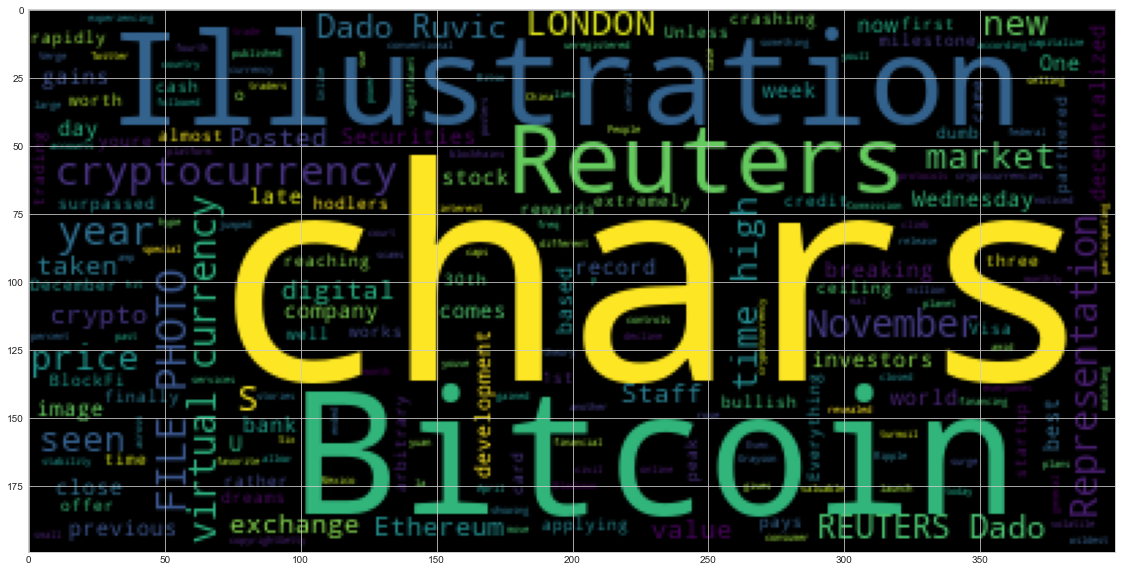

In [25]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_big_string)
plt.imshow(wc)

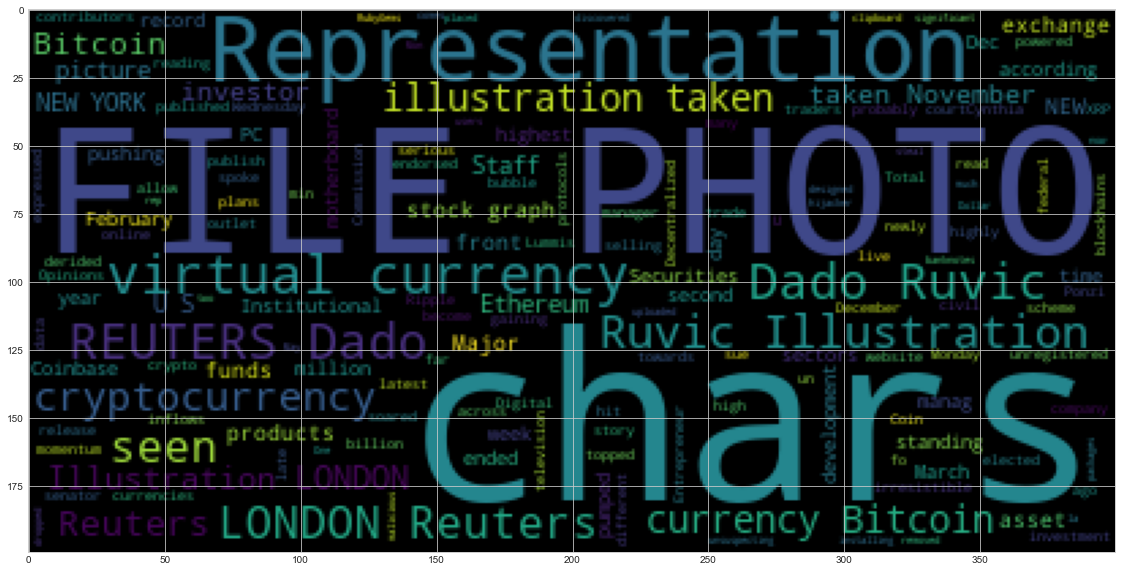

In [26]:
ethereum_big_string = ' '.join(ethereum_articles_df['text'])

# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_big_string)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_big_string)
displacy.render(doc, style='ent')

---

## Ethereum NER

In [31]:
# Run the NER processor on all of the text
doc = nlp(ethereum_big_string)
displacy.render(doc, style='ent')